In [2]:
import time

import werkzeug
werkzeug.cached_property = werkzeug.utils.cached_property
from robobrowser import RoboBrowser

import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import ticker

from IPython.display import clear_output

In [25]:
APPS = [
    "https://play.google.com/store/apps/details?id=it.ministerodellasalute.immuni&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.mds.mammainsalute&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.accenture.com&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.gag.salvaunavita&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.inps.mobile.app.servizi.activity&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.inps.mobile.app.tablet&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.inps.mobile.app.welfare&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.inps.mobile.app.ufficiostampa&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.inps.inpspersonal&hl=it_IT",
    "https://play.google.com/store/apps/details?id=inps.musei&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.inps.mobile.app.ufficiostampatablet&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.inps.inpspersonal.tablet&hl=it_IT",
    "https://play.google.com/store/apps/details?id=inps.artcom&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.siss.gp.salutile&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.siss.app.mobile.salutile.referti&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.siss.app.mobile.salutile.vaccinazioni&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.siss.app.mobile.salutile.ps&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.siss.app.mobile.salutile.ricette&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.siss.app.mobile.salutile.noglutine&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.siss.app.mobile.veterinaria.zampaazampa&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.Beta80Group.whereareu&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.lispa.sire.app.mobile.allertalom&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.comunicaitalia.sistemadiallerta&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.protezionecivilecalabria.easyalert&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.sardegna.regione.protezionecivile&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.livorno.comune.protcivli&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.fvg.protezionecivile.mopic&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.univaq.allarmeteo&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.zerobyte.zeroapp_newsprovli&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.iwikiphone.portaleautomobilista&hl=it_IT",
    # non istituzionali
    "https://play.google.com/store/apps/details?id=io.faceapp&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.teacapps.barcodescanner&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.zhiliaoapp.musically&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.zzkko&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.wind.myWind&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.google.android.apps.subscriptions.red&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.disney.disneyplus&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.AnotheReality.MR.FINITheExperience&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.flowe.flowe&hl=it_IT",
    "https://play.google.com/store/apps/details?id=appinventor.ai_luigialfonso1982.iLiad_App&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.prequel.app&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.dazn&hl=it_IT",
    "https://play.google.com/store/apps/details?id=tv.twitch.android.app&hl=it_IT",
    "https://play.google.com/store/apps/details?id=sg.bigo.live&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.tinder&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.google.android.apps.meetings&hl=it_IT",
    "https://play.google.com/store/apps/details?id=posteitaliane.posteapp.appposteid&hl=it_IT",
    "https://play.google.com/store/apps/details?id=us.zoom.videomeetings&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.contextlogic.wish&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.whatsapp&hl=it_IT",
    "https://play.google.com/store/apps/details?id=org.telegram.messenger&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.gamma.scan&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.picsart.studio&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.amazon.mShop.android.shopping&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.instagram.android&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.pinterest&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.ebay.mobile&hl=it_IT",
    "https://play.google.com/store/apps/details?id=de.zalando.mobile&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.spotify.music&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.rainet&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.netflix.mediaclient&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.UnipolSaiApp&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.microsoft.teams&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.vova.android&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.fabbricadigitale.android.videomediaset&hl=it_IT",
    "https://play.google.com/store/apps/details?id=it.hype.app&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.ilmeteo.android.ilmeteo&hl=it_IT",
    "https://play.google.com/store/apps/details?id=posteitaliane.posteapp.apppostepay&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.snapchat.android&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.shazam.android&hl=it_IT",
    "https://play.google.com/store/apps/details?id=com.facebook.orca&hl=it_IT",
]

In [26]:
done = []
rates = []
for i, app in enumerate(APPS):
    reviews = None
    downloads = None
    browser = RoboBrowser(history=False, parser="lxml")
    print(f"({i+1}/{len(APPS)}) --> {app}")
    browser.open(app)
    reviews_elements = browser.select("span.AYi5wd.TBRnV")
    try:
        reviews = int(reviews_elements[0].text.replace(".", ""))
    except Exception as err:
        print(err)
        continue
    downloads_elements = browser.select(".htlgb")
    for download in downloads_elements:
        if "+" in download.text:
            downloads = int(download.text.replace("+", "").replace(".", ""))
            break
    if not reviews or not downloads:
        print("ERROR")
        continue
    rate = reviews / downloads
    rates.append(rate)
    done.append(done)
    print(f"{reviews} / {downloads} = {rate}")

(1/71) --> https://play.google.com/store/apps/details?id=it.ministerodellasalute.immuni&hl=it_IT
18129 / 1000000 = 0.018129
(2/71) --> https://play.google.com/store/apps/details?id=it.mds.mammainsalute&hl=it_IT
22 / 5000 = 0.0044
(3/71) --> https://play.google.com/store/apps/details?id=com.accenture.com&hl=it_IT
58 / 1000 = 0.058
(4/71) --> https://play.google.com/store/apps/details?id=com.gag.salvaunavita&hl=it_IT
ERROR
(5/71) --> https://play.google.com/store/apps/details?id=it.inps.mobile.app.servizi.activity&hl=it_IT
16391 / 1000000 = 0.016391
(6/71) --> https://play.google.com/store/apps/details?id=it.inps.mobile.app.tablet&hl=it_IT
784 / 100000 = 0.00784
(7/71) --> https://play.google.com/store/apps/details?id=it.inps.mobile.app.welfare&hl=it_IT
13 / 5000 = 0.0026
(8/71) --> https://play.google.com/store/apps/details?id=it.inps.mobile.app.ufficiostampa&hl=it_IT
149 / 10000 = 0.0149
(9/71) --> https://play.google.com/store/apps/details?id=it.inps.inpspersonal&hl=it_IT
63 / 10000 =

list index out of range
(71/71) --> https://play.google.com/store/apps/details?id=com.facebook.orca&hl=it_IT
73012497 / 1000000000 = 0.073012497


In [27]:
rates = np.array(rates)

In [28]:
df_rates = pd.DataFrame(rates)
df_rates.to_csv("rates.csv", index=False)

In [30]:
df_rates = pd.read_csv("rates.csv")
df_rates

,0
0,0.018129
1,0.004400
2,0.058000
3,0.016391
4,0.007840
5,0.002600
6,0.014900
7,0.006300
8,0.019000
9,0.022000


Text(0.5, 0, 'Campioni')

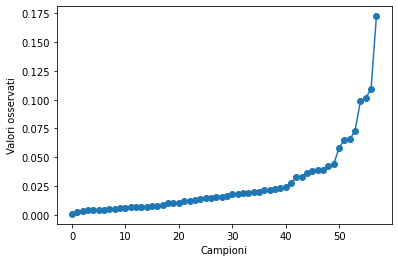

In [83]:
plt.plot(
    sorted(rates),
    marker="o"
)
plt.ylabel("Valori osservati")
plt.xlabel("Campioni")

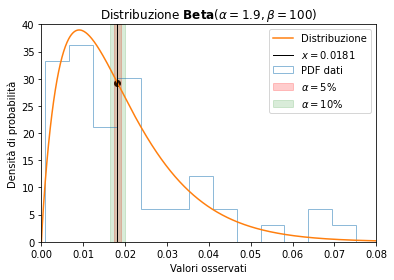

In [243]:
alpha = 1.9
beta = 100
plt.hist(df_rates["0"], density=True, histtype="step", alpha=.5, bins=30, label="PDF dati")
dist = sps.beta(a=alpha, b=beta)
#rvs = dist.rvs(1000)
#plt.hist(rvs, density=True, alpha=.1, bins=5)
x = np.linspace(
    0,
    .1,
    1000
)
y = dist.pdf(x)
plt.plot(x, y, label="Distribuzione")

#lo95, hi95 = HDIofICDF(sps.beta, credMass=.95, a=alpha, b=beta)
#lo50, hi50 = HDIofICDF(sps.beta, credMass=.50, a=alpha, b=beta)
#plt.plot(
#    [lo95, hi95], [dist.pdf(lo95), dist.pdf(hi95)], c="r", 
#    label=f"CI 95% = {lo95:.2f}-{hi95:.2f}")
#plt.plot(
#    [lo50, hi50], [dist.pdf(lo50), dist.pdf(hi50)], c="r", 
#    label=f"CI 50% = {lo50:.2f}-{hi50:.2f}")
#omega = x[dist.pdf(x).argmax()]
#plt.axvline(omega, c="k", ls=":")

plt.scatter(rates[0], dist.pdf(rates[0]), c="k")

#mu = dist.ppf(.5)
mu = rates[0]
plt.axvline(mu, c="k", ls="-", lw=1, label=fr"$x={mu:.4f}$")

alpha1 = .05
alpha2 = .1
r_min_1 = dist.ppf(dist.cdf(mu)-alpha1/2)
r_max_1 = dist.ppf(dist.cdf(mu)+alpha1/2)
r_min_2 = dist.ppf(dist.cdf(mu)-alpha2/2)
r_max_2 = dist.ppf(dist.cdf(mu)+alpha2/2)
plt.fill_betweenx([0,40], r_min_1, r_max_1, color="r", alpha=.2, label=fr"$\alpha = {alpha1*100:.0f}\%$")
plt.fill_betweenx([0,40], r_min_2, r_max_2, color="g", alpha=.15, label=fr"$\alpha = {alpha2*100:.0f}\%$")

plt.legend(loc="upper right")

plt.xlabel("Valori osservati")
plt.ylabel("Densità di probabilità")
plt.title(fr"Distribuzione $\mathbf{{Beta}}(\alpha={alpha}, \beta={beta})$")

plt.xlim(0, .08)
plt.ylim(0, 40)
plt.show();

In [319]:
rates.mean()

0.0270039347

In [320]:
rates.std(ddof=len(rates)-1)

0.23833396925352449

In [203]:
rates[0]

0.018129

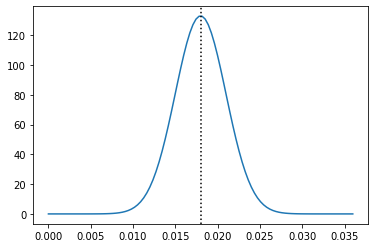

In [360]:
_x = np.linspace(0, rates[0]*2, 100)
yerr = sps.norm(loc=rates[0], scale=.003)
_y = yerr.pdf(_x)
plt.plot(
    _x,
    _y
)
plt.axvline(rates[0], c="k", ls=":")

In [322]:
def mean_confidence_interval(data, dist=dist, confidence=[.95, .5]):
    res = np.array([])
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sps.sem(a)
    res = np.append(res, m)
    for c in confidence:
        h = se * dist.ppf((1 + c) / 2.)
        res = np.append(res, [m-h, m+h])
    return np.array(sorted(res))
rr = mean_confidence_interval(rates)
rr

array([0.02672097, 0.02685534, 0.02700393, 0.02715253, 0.0272869 ])

In [228]:
dist.ppf(.5)

0.015701893345916578

In [229]:
rate_mode, _ = sps.mode(rates)
rate_mode

array([0.0054])

In [245]:
# got from play store 18 June 2020
downloads_reviews_rates = np.array([
    r_min_2,
    r_min_1,
    mu,
    r_max_1,
    r_max_2
])

it_pop = 60359546

rates_df = pd.DataFrame({
    "rates": [r_min_2, r_min_1, mu, r_max_1, r_max_2]
})
rates_df.to_csv("rates_levels.csv", index=False)

In [48]:
browser = RoboBrowser(history=False, parser="lxml")
browser.open("https://play.google.com/store/apps/details?id=it.ministerodellasalute.immuni&hl=it_IT")

In [49]:
google = browser.select(".AYi5wd.TBRnV")

In [50]:
google_reviews = int(google[0].text.replace(".", ""))
google_reviews

18142

In [233]:
google_downloads = google_reviews * 1 / downloads_reviews_rates
google_downloads

array([1100202.52267959, 1049095.64292444, 1000717.08312648,
        954721.75833636,  910804.0147867 ])

In [52]:
browser = RoboBrowser(history=False, parser="lxml")
browser.open("https://apps.apple.com/it/app/immuni/id1513940977")

In [53]:
apple = browser.select(".we-customer-ratings__count.small-hide.medium-show")

In [54]:
apple_reviews = int(apple[0].text.split(" ")[0].replace(",", ""))
apple_reviews

7426

In [234]:
apple_downloads = apple_reviews * 1 / downloads_reviews_rates
apple_downloads

array([450341.96524191, 429422.56886545, 409619.94594296, 390792.84408587,
       372816.15113031])

In [235]:
total_downloads = google_downloads + apple_downloads
total_downloads

array([1550544.4879215 , 1478518.21178989, 1410337.02906945,
       1345514.60242223, 1283620.16591701])

In [236]:
percentage = total_downloads / it_pop
percentage

array([0.02568847, 0.02449518, 0.0233656 , 0.02229166, 0.02126623])

In [237]:
today = pd.Timestamp.now().date()

In [298]:
dic = {
    "date": today,
    "total_min_2": total_downloads[0],
    "total_min_1": total_downloads[1],
    "total_mean": total_downloads[2],
    "total_max_1": total_downloads[3],
    "total_max_2": total_downloads[4],
}

In [299]:
df = pd.DataFrame(dic, index=["date"])
df

,date,total_min_2,total_min_1,total_mean,total_max_1,total_max_2
date,2020-06-18,1.550544e+06,1.478518e+06,1.410337e+06,1.345515e+06,1.283620e+06


In [264]:
df = pd.read_csv("immuni.csv", index_col=["date"], parse_dates=["date"])
df

,total_min_2,total_min_1,total_mean,total_max_1,total_max_2
date,,,,,
2020-06-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-06-18,1.550544e+06,1.478518e+06,1.410337e+06,1.345515e+06,1.283620e+06
2020-06-19,1.553577e+06,1.481410e+06,1.413095e+06,1.348146e+06,1.286130e+06
2020-06-20,1.554244e+06,1.482046e+06,1.413702e+06,1.348725e+06,1.286683e+06


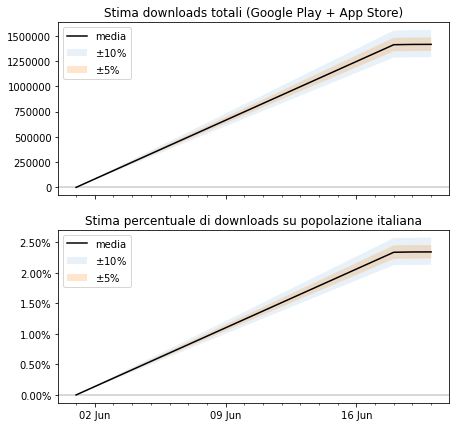

In [272]:
fig, ax = plt.subplots(2, 1, figsize=(7,7), sharex=True)
ax[0].fill_between(
    df.index,
    df["total_min_2"],
    df["total_max_2"],
    alpha=.1, label=fr"$\pm {alpha2*100:.0f}\%$"
)
ax[0].fill_between(
    df.index,
    df["total_min_1"],
    df["total_max_1"],
    alpha=.2, label=fr"$\pm {alpha1*100:.0f}\%$"
)
ax[0].plot(
    df.index,
    df["total_mean"],
    c="k", label="media"
)
# PERCENTAGE
ax[1].plot(
    df.index,
    df["total_mean"]/it_pop*100,
    c="k", label="media"
)
ax[1].fill_between(
    df.index,
    df["total_min_2"]/it_pop*100,
    df["total_max_2"]/it_pop*100,
    alpha=.1, label=fr"$\pm {alpha2*100:.0f}\%$"
)
ax[1].fill_between(
    df.index,
    df["total_min_1"]/it_pop*100,
    df["total_max_1"]/it_pop*100,
    alpha=.2, label=fr"$\pm {alpha1*100:.0f}\%$"
)
ax[0].set_title("Stima downloads totali (Google Play + App Store)")
ax[0].ticklabel_format(style='plain', axis="y")
ax[0].axhline(0, c="k", alpha=.2)
ax[0].xaxis.set_major_locator(mdates.WeekdayLocator())
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax[0].xaxis.set_minor_locator(mdates.DayLocator())
ax[0].legend(loc="upper left")

ax[1].set_title("Stima percentuale di downloads su popolazione italiana")
ax[1].yaxis.set_major_formatter(ticker.PercentFormatter())
ax[1].axhline(0, c="k", alpha=.2)
ax[1].legend(loc="upper left")

In [278]:
df.to_csv("immuni.csv", index=True)

In [84]:
total_downloads * .9

1273221.0

In [247]:
pd.read_csv("rates_levels.csv")["rates"]

0    0.016490
1    0.017293
2    0.018129
3    0.019002
4    0.019919
Name: rates, dtype: float64

In [270]:
df.columns

Index(['total_min_2', 'total_min_1', 'total_mean', 'total_max_1',
       'total_max_2'],
      dtype='object')

In [273]:
df

,total_min_2,total_min_1,total_mean,total_max_1,total_max_2
date,,,,,
2020-06-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-06-18,1.550544e+06,1.478518e+06,1.410337e+06,1.345515e+06,1.283620e+06
2020-06-19,1.553577e+06,1.481410e+06,1.413095e+06,1.348146e+06,1.286130e+06
2020-06-20,1.554244e+06,1.482046e+06,1.413702e+06,1.348725e+06,1.286683e+06


In [279]:
old = pd.read_csv("immuni.csv", index_col=["date"], parse_dates=["date"])

In [280]:
old

,total_min_2,total_min_1,total_mean,total_max_1,total_max_2
date,,,,,
2020-06-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2020-06-18,1.550544e+06,1.478518e+06,1.410337e+06,1.345515e+06,1.283620e+06
2020-06-19,1.553577e+06,1.481410e+06,1.413095e+06,1.348146e+06,1.286130e+06
2020-06-20,1.554244e+06,1.482046e+06,1.413702e+06,1.348725e+06,1.286683e+06


In [308]:
dic1 = {
    "date": [today],
    "total_min_2": [total_downloads[0]],
    "total_min_1": [total_downloads[1]],
    "total_mean": [total_downloads[2]],
    "total_max_1": [total_downloads[3]],
    "total_max_2": [total_downloads[4]],
}
df1 = pd.DataFrame(dic1)
df1.set_index("date", inplace=True)
df1

,total_min_2,total_min_1,total_mean,total_max_1,total_max_2
date,,,,,
2020-06-18,1.550544e+06,1.478518e+06,1.410337e+06,1.345515e+06,1.283620e+06


In [292]:
list(dic1.keys())[1:5]

['total_min_2', 'total_min_1', 'total_mean', 'total_max_1']